In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import timedelta

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
os.getcwd()

'/Users/cha/Desktop/공모전/삼성화재X포스텍_리스크경진대회/내코드/data'

# Data Load

In [6]:
# brazil = pd.read_csv('예측모델data/brazilNE_data.csv')
pcp = pd.read_csv('예측모델data/상파울루강수량.csv')
air = pd.read_csv('예측모델data/상파울루기후.csv')

In [7]:
start_date = '2018-05-01'
end_date = '2018-08-31'
filtered_data = air[(air['date'] >= start_date) & (air['date'] <= end_date)]

# 기온이 18도 이상이고 24도 이하인 날의 수 계산
temperature_between_18_and_24 = filtered_data[(filtered_data['air temperature'] >= 18) & (filtered_data['air temperature'] <= 24)]
count_days_within_range = len(temperature_between_18_and_24)

# 전체 일수 계산
total_days = len(filtered_data)

# 비율 계산
ratio = count_days_within_range / total_days

print(f"2018년 5월 1일부터 8월 31일까지의 기온이 18-24도인 일 수 비율: {ratio:.2f}")

2018년 5월 1일부터 8월 31일까지의 기온이 18-24도인 일 수 비율: 0.44


In [8]:
start_date = '2019-05-01'
end_date = '2019-08-31'
filtered_data = air[(air['date'] >= start_date) & (air['date'] <= end_date)]

# 기온이 18도 이상이고 24도 이하인 날의 수 계산
temperature_between_18_and_24 = filtered_data[(filtered_data['air temperature'] >= 18) & (filtered_data['air temperature'] <= 24)]
count_days_within_range = len(temperature_between_18_and_24)

# 전체 일수 계산
total_days = len(filtered_data)

# 비율 계산
ratio = count_days_within_range / total_days

print(f"2019년 5월 1일부터 8월 31일까지의 기온이 18-24도인 일 수 비율: {ratio:.2f}")

2019년 5월 1일부터 8월 31일까지의 기온이 18-24도인 일 수 비율: 0.50


In [9]:
start_date = '2020-05-01'
end_date = '2020-08-31'
filtered_data = air[(air['date'] >= start_date) & (air['date'] <= end_date)]

# 기온이 18도 이상이고 24도 이하인 날의 수 계산
temperature_between_18_and_24 = filtered_data[(filtered_data['air temperature'] >= 18) & (filtered_data['air temperature'] <= 24)]
count_days_within_range = len(temperature_between_18_and_24)

# 전체 일수 계산
total_days = len(filtered_data)

# 비율 계산
ratio = count_days_within_range / total_days

print(f"2020년 5월 1일부터 8월 31일까지의 기온이 18-24도인 일 수 비율: {ratio:.2f}")

2020년 5월 1일부터 8월 31일까지의 기온이 18-24도인 일 수 비율: 0.46


In [10]:
# 데이터프레임에서 5월 1일부터 8월 31일까지의 데이터 추출
start_date = '05-01'
end_date = '08-31'

# 2018년 데이터 추출
data_2018 = air[(air['date'] >= '2018-' + start_date) & (air['date'] <= '2018-' + end_date)]

# 2019년 데이터 추출
data_2019 = air[(air['date'] >= '2019-' + start_date) & (air['date'] <= '2019-' + end_date)]

# 2020년 데이터 추출
data_2020 = air[(air['date'] >= '2020-' + start_date) & (air['date'] <= '2020-' + end_date)]

# 습도 점수 계산 함수
def calculate_humidity_score(humidity):
    if 60 <= humidity < 75:
        return 20
    elif 75 <= humidity < 85 or 55<= humidity<60:
        return 14
    else:
        return 0  # 습도 범위를 벗어나는 경우

# 각 연도의 습도 점수 계산
data_2018['humidity_score'] = data_2018['relative air humidity'].apply(calculate_humidity_score)
data_2019['humidity_score'] = data_2019['relative air humidity'].apply(calculate_humidity_score)
data_2020['humidity_score'] = data_2020['relative air humidity'].apply(calculate_humidity_score)

# # 결과 출력 (예시로 처음 10개 행 출력)
# print("2018년 데이터:")
# print(data_2018[['date', 'relative air humidity', 'humidity_score']].head(10))

# print("2019년 데이터:")
# print(data_2019[['date', 'relative air humidity', 'humidity_score']].head(10))

# print("2020년 데이터:")
# print(data_2020[['date', 'relative air humidity', 'humidity_score']].head(10))

In [11]:
m18 = data_2018['humidity_score'].mean()
m19 = data_2019['humidity_score'].mean()
m20 = data_2020['humidity_score'].mean()
print(m18,m19,m20)

10.390243902439025 10.56910569105691 11.626016260162602


In [12]:
# 습도 점수 계산 함수
def calculate_wind_score(humidity):
    if 0 <= humidity <= 5:
        return 20
    elif 6< humidity < 14: #15m/s부터 강풍
        return 14
    else:
        return 0  # 습도 범위를 벗어나는 경우

# 각 연도의 습도 점수 계산
data_2018['wind_score'] = data_2018['wind speed'].apply(calculate_wind_score)
data_2019['wind_score'] = data_2019['wind speed'].apply(calculate_wind_score)
data_2020['wind_score'] = data_2020['wind speed'].apply(calculate_wind_score)

In [13]:
m18 = data_2018['wind_score'].mean()
m19 = data_2019['wind_score'].mean()
m20 = data_2020['wind_score'].mean()
print(m18,m19,m20)

19.83739837398374 19.51219512195122 19.51219512195122


In [15]:
pcp['Date'] = pd.to_datetime(pcp['Date'])
pcp['year'] = pcp['Date'].dt.year  # 'year' 컬럼 생성
annual_total_precipitation = pcp.groupby('year')['Precipitation'].sum().reset_index()
annual_total_precipitation.rename(columns={'Precipitation': 'annual_total_precipitation'}, inplace=True)

annual_total_precipitation

,year,annual_total_precipitation
0,1984,1166.2
1,1985,1197.0
2,1986,1664.3
3,1987,1746.5
4,1988,1799.6
5,1989,1570.5
6,1990,1416.4
7,1991,1922.6
8,1992,1648.2
9,1993,1582.9


-> 2022년은 1개월 뿐

커피재배지수는 강수량,온도 30 나머지 습도와 풍속은 20 으로 해서 100점만점 기준으로 만들었습니다 

In [16]:
score = pd.read_excel('예측모델data/커피재배지수.xlsx')
score

,year,기온,humidity20,기온30,강수량30,풍속20,연간강수량,커피재배지수
0,2018,0.44,10.39,13.2,20,19.84,1178.1,63.43
1,2019,0.50,10.57,15.0,30,19.51,1774.5,75.08
2,2020,0.46,11.63,13.8,20,19.51,1090.6,64.94


# 브라질 원두 생산량

In [17]:
coffee = pd.read_excel('예측모델data/브라질원두생산량.xlsx')

In [18]:
coffee

,month,year,location,재배면적(헥타르),수확면적(헥타르),생산량(톤),평균 수확량(헥타르당 킬로그램)
0,9,2006,Brazil,2541088,2343902,2583027,1102
1,9,2006,Minas Gerais,1194479,1075993,1308283,1216
2,9,2006,São Paulo,236013,220186,259820,1180
3,9,2006,Paraná,100874,100874,131145,1300
4,10,2006,Brazil,2542552,2343158,2593131,1107
...,...,...,...,...,...,...,...
811,7,2023,Paraná,25800,25800,41400,1605
812,8,2023,Brazil,1926032,1912502,3308623,4007
813,8,2023,Minas Gerais,1071800,1071800,1687058,3970
814,8,2023,São Paulo,190948,188780,285021,3023


In [19]:
cof_2018 = coffee[(coffee['year']==2018)&(coffee['location']=='São Paulo')]
print(cof_2018['생산량(톤)'].sum())

cof_2019 = coffee[(coffee['year']==2019)&(coffee['location']=='São Paulo')]
print(cof_2019['생산량(톤)'].sum())

cof_2020 = coffee[(coffee['year']==2020)&(coffee['location']=='São Paulo')]
print(cof_2020['생산량(톤)'].sum())

4095507
3383872
3942424


In [20]:
score['production'] = np.NaN

In [21]:
score['production'][0] = cof_2018['생산량(톤)'].sum()
score['production'][1] = cof_2019['생산량(톤)'].sum()
score['production'][2] = cof_2020['생산량(톤)'].sum()

In [22]:
score

,year,기온,humidity20,기온30,강수량30,풍속20,연간강수량,커피재배지수,production
0,2018,0.44,10.39,13.2,20,19.84,1178.1,63.43,4095507.0
1,2019,0.50,10.57,15.0,30,19.51,1774.5,75.08,3383872.0
2,2020,0.46,11.63,13.8,20,19.51,1090.6,64.94,3942424.0


# 사용 데이터 가공 
## Xs

In [29]:
air['date'] = pd.to_datetime(air['date'])

In [42]:
data = air.copy()
data = data.drop('height', axis=1)
data['precipitation'] = np.NaN

In [43]:
data['precipitation'] = np.NaN

In [38]:
pcp_to2018 = pcp[pcp['Date'].dt.year>=2018]
pcp_to2018

,Date,Precipitation,year
408,2018-01-31,244.3,2018
409,2018-02-28,102.2,2018
410,2018-03-31,220.5,2018
411,2018-04-30,28.0,2018
412,2018-05-31,10.8,2018
413,2018-06-30,12.7,2018
414,2018-07-31,24.2,2018
415,2018-08-31,48.8,2018
416,2018-09-30,72.8,2018
417,2018-10-31,121.0,2018


In [44]:
data['datetime_m'] = data['date'].dt.strftime('%Y-%m')
pcp_to2018['datetime_m'] = pcp_to2018['Date'].dt.strftime('%Y-%m')

In [48]:
pcp_to2018.reset_index(inplace=True)

In [50]:
for i in range(len(data)):
    for j in range(len(pcp_to2018)):
        if data['datetime_m'][i] == pcp_to2018['datetime_m'][j]:
            data['precipitation'][i] = pcp_to2018['Precipitation'][j]

In [51]:
data

,date,atmospheric pressure,air temperature,relative air humidity,wind speed,precipitation,datetime_m
0,2018-03-14,926.860833,20.721667,87.050000,3.82,220.5,2018-03
1,2018-03-15,927.022500,18.785000,81.050000,4.00,220.5,2018-03
2,2018-03-16,926.325000,24.325000,77.666667,3.90,220.5,2018-03
3,2018-03-17,926.666667,22.816667,84.208333,3.70,220.5,2018-03
4,2018-03-18,924.720833,22.400000,84.458333,3.90,220.5,2018-03
...,...,...,...,...,...,...,...
1139,2021-04-26,926.137500,19.495833,86.083333,4.20,54.4,2021-04
1140,2021-04-27,927.141667,18.125000,94.458333,3.52,54.4,2021-04
1141,2021-04-28,928.654167,17.491667,85.583333,4.08,54.4,2021-04
1142,2021-04-29,932.191667,16.354167,85.875000,3.14,54.4,2021-04


In [53]:
data_per_month = data.groupby(by='datetime_m').mean()

In [54]:
data_per_month

,atmospheric pressure,air temperature,relative air humidity,wind speed,precipitation
datetime_m,,,,,
2018-03,926.809028,22.239954,83.646759,3.623333,220.5
2018-04,929.876944,20.185139,82.262500,3.730000,28.0
2018-05,930.728360,18.181855,80.396505,3.509677,10.8
2018-06,931.273611,17.508333,80.954167,3.126667,12.7
2018-07,931.267608,17.250538,75.723118,3.080645,24.2
2018-08,931.392070,15.878360,81.629032,3.454839,48.8
2018-09,927.953611,17.862917,82.837500,4.140000,72.8
2018-10,927.073387,18.819892,87.458333,3.874194,121.0
2018-11,927.008056,19.702361,84.700000,4.330000,101.7


## y

In [62]:
coffee = pd.read_excel('예측모델data/브라질원두생산량.xlsx')

In [183]:
coffee

,month,year,location,재배면적(헥타르),수확면적(헥타르),생산량(톤),평균 수확량(헥타르당 킬로그램)
0,9,2006,Brazil,2541088,2343902,2583027,1102
1,9,2006,Minas Gerais,1194479,1075993,1308283,1216
2,9,2006,São Paulo,236013,220186,259820,1180
3,9,2006,Paraná,100874,100874,131145,1300
4,10,2006,Brazil,2542552,2343158,2593131,1107
...,...,...,...,...,...,...,...
811,7,2023,Paraná,25800,25800,41400,1605
812,8,2023,Brazil,1926032,1912502,3308623,4007
813,8,2023,Minas Gerais,1071800,1071800,1687058,3970
814,8,2023,São Paulo,190948,188780,285021,3023


In [80]:
cof = coffee[((coffee['year']==2018) | (coffee['year']==2019) | (coffee['year']==2020) | (coffee['year']==2021)) &(coffee['location']=='São Paulo')]

In [81]:
cof = cof.astype({'month':'str', 'year':'str'})
cof['datetime_m'] = cof['year']+'-'+cof['month']
cof['datetime_m'] = pd.to_datetime(cof['datetime_m'])
cof['datetime_m'] = cof['datetime_m'].dt.strftime('%Y-%m')

In [83]:
cof.reset_index(inplace=True)

In [82]:
data['production'] = np.NaN

In [86]:
for i in range(len(data)):
    for j in range(len(cof)):
        if data['datetime_m'][i] == cof['datetime_m'][j]:
            data['production'][i] = cof['생산량(톤)'][j]

In [88]:
data_per_month = data.groupby(by='datetime_m').mean()

In [89]:
data_per_month

,atmospheric pressure,air temperature,relative air humidity,wind speed,precipitation,production
datetime_m,,,,,,
2018-03,926.809028,22.239954,83.646759,3.623333,220.5,271791.0
2018-04,929.876944,20.185139,82.262500,3.730000,28.0,358943.0
2018-05,930.728360,18.181855,80.396505,3.509677,10.8,358943.0
2018-06,931.273611,17.508333,80.954167,3.126667,12.7,364536.0
2018-07,931.267608,17.250538,75.723118,3.080645,24.2,364536.0
2018-08,931.392070,15.878360,81.629032,3.454839,48.8,364536.0
2018-09,927.953611,17.862917,82.837500,4.140000,72.8,364781.0
2018-10,927.073387,18.819892,87.458333,3.874194,121.0,364781.0
2018-11,927.008056,19.702361,84.700000,4.330000,101.7,364781.0


In [91]:
len(data_per_month)

38

In [219]:
sp = coffee[(coffee['location']=='São Paulo')]

In [231]:
sp

,month,year,location,재배면적(헥타르),수확면적(헥타르),생산량(톤),평균 수확량(헥타르당 킬로그램),datetime_m
2,9,2006,São Paulo,236013,220186,259820,1180,2006-09-01
6,10,2006,São Paulo,236013,220186,259820,1180,2006-10-01
10,11,2006,São Paulo,236013,220186,259820,1180,2006-11-01
14,12,2006,São Paulo,236013,220186,259820,1180,2006-12-01
18,1,2007,São Paulo,236010,220186,187158,850,2007-01-01
...,...,...,...,...,...,...,...,...
798,4,2023,São Paulo,190948,188780,285021,3023,2023-04-01
802,5,2023,São Paulo,190948,188780,285021,3023,2023-05-01
806,6,2023,São Paulo,190948,188780,285021,3023,2023-06-01
810,7,2023,São Paulo,190948,188780,285021,3023,2023-07-01


In [220]:
sp = sp.astype({'month':'str', 'year':'str'})
sp['datetime_m'] = sp['year']+'-'+sp['month']
sp['datetime_m'] = pd.to_datetime(sp['datetime_m'])
sp['datetime_m'] = sp['datetime_m'].dt.strftime('%Y-%m')

In [221]:
sp['datetime_m'] = pd.to_datetime(sp['datetime_m'])

In [201]:
from datetime import datetime

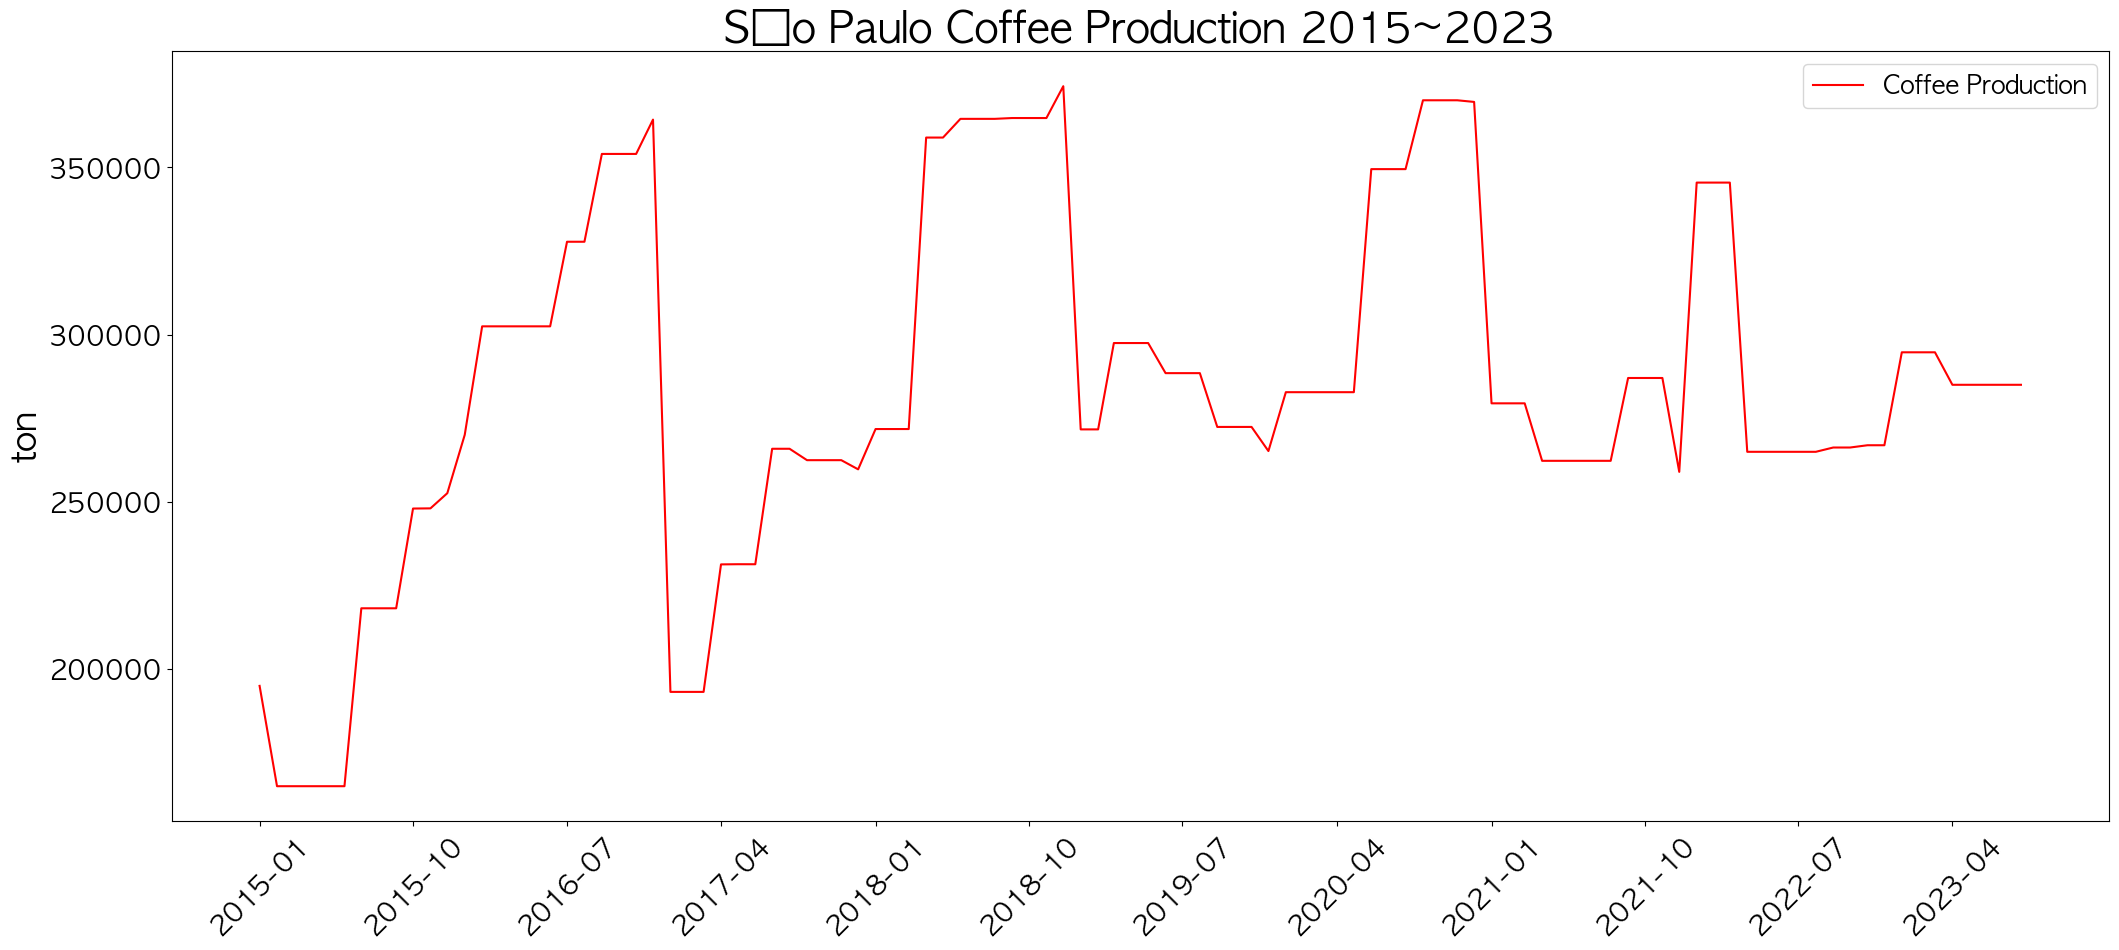

In [230]:
a = sp[sp['datetime_m'].dt.year>=2015]
#a['datetime_m'] = str(a['datetime_m'])

fig, ax1 = plt.subplots(figsize=(25, 10))

line1 = ax1.plot(a['datetime_m'], a['생산량(톤)'], label='Coffee Production', color='r')

# line2 = ax1.plot(a['Date'], a['Low'], label='Low Coffee Price', color='b')

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('ton', fontdict={'fontsize':25})

#plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
plt.xticks(a['datetime_m'][::9], a['datetime_m'][::9].dt.strftime('%Y-%m'), rotation=45)
plt.title('São Paulo Coffee Production 2015~2023', fontdict = {'fontsize' : 30})
# plt.axvline(x=datetime(2022,2), color='0.5', linestyle='--', linewidth=2)
plt.rcParams['font.size'] = 20
plt.show()

# model

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [136]:
X = data_per_month.drop('production', axis=1)
y = data_per_month.loc[:, ['production']]

In [137]:
X_train = X[X.index < '2020-10']
X_test = X[X.index >= '2020-10']
y_train = y[y.index < '2020-10']
y_test = y[y.index >= '2020-10']

In [138]:
print('X_train:', len(X_train))
print('y_train:', len(y_train))
print('X_test:', len(X_test))
print('y_test:', len(y_test))

X_train: 31
y_train: 31
X_test: 7
y_test: 7


In [139]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [140]:
# 가중치 확인
tmp = pd.DataFrame(linear_reg.coef_)
tmp.columns = X_test.columns
tmp.T

,0
atmospheric pressure,-2625.779494
air temperature,-6712.956072
relative air humidity,-433.847873
wind speed,21068.641305
precipitation,-96.376419


In [141]:
y_train_pred = linear_reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mae

30484.32404863402

In [142]:
y_pred = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

34923.836803968465

In [143]:
# result
y_predict_train = pd.DataFrame(y_train_pred, index=y_train.index, columns=['predict'])
y_predict = pd.DataFrame(y_pred, index=y_test.index, columns=['predict'])

print('Train MAE:', train_mae)
print('Test MAE:', mae)

Train MAE: 30484.32404863402
Test MAE: 34923.836803968465


In [144]:
train_result_y = y_train.merge(y_predict_train, left_index=True, right_index=True, how = "outer")
test_result_y = y_test.merge(y_predict, left_index=True, right_index=True, how = "outer")

result_y = pd.concat([train_result_y, test_result_y])

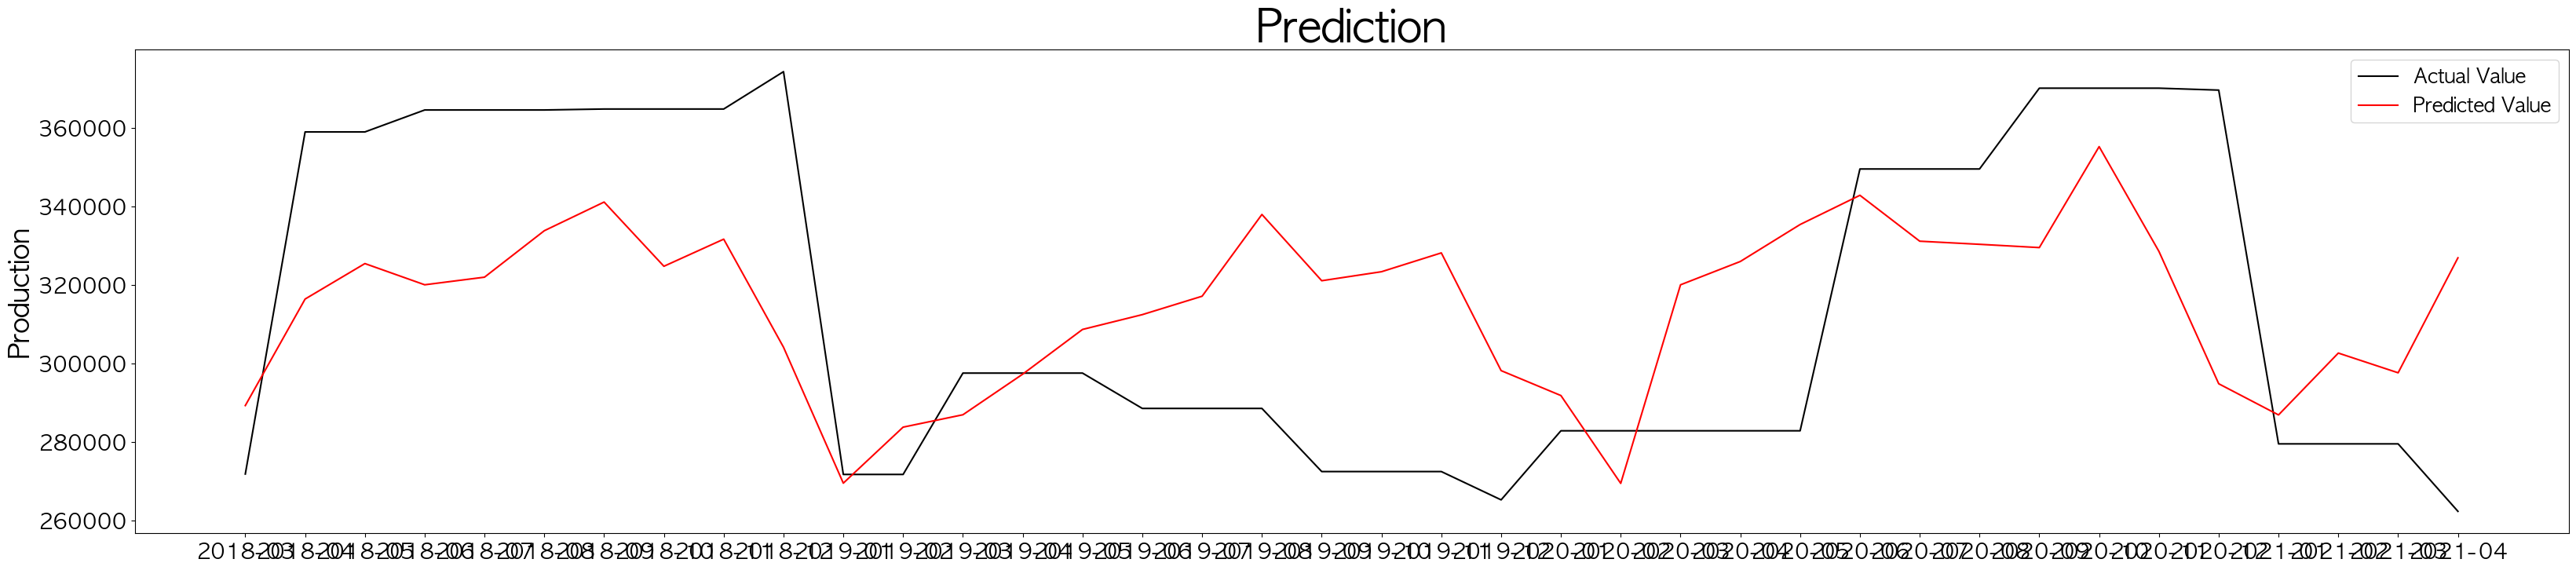

In [145]:
# graph
fig, ax1 = plt.subplots(figsize=(40, 8))

A = pd.concat([y_train, y_test]) # actual value
B = pd.concat([y_predict_train,y_predict]) # predicted value

line1 = ax1.plot(A.index, A['production'], label='Actual Value', color='k')
line2 = ax1.plot(B.index, B['predict'], label='Predicted Value', color='r')
#line3 = ax2.plot(result_y.index, abs(result_y['res']), label='Residual', color='0.5')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('Production', fontdict={'fontsize':25})
#ax2.set_ylabel('Residual', fontdict={'fontsize':25})

# A.reset_index(inplace=True)
# A['datetime_m'] = pd.to_datetime(A['datetime_m'])
# a = A[(A['datetime_m'].dt.month==3)|(A['datetime_m'].dt.month==9)]
# a.set_index('datetime_m', inplace=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xticks(a.index[::2], a.index[::2].strftime('%Y-%m-%d'), rotation=45)
plt.title(f'Prediction', fontdict = {'fontsize' : 40})
#plt.title(f'Train MAE: {round(train_mae, 2)}, Test MAE: {round(mae, 2)}', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
# plt.axhline(3.1, color='0.5', linestyle='--', linewidth=2)
# plt.axvline(x=datetime(2022,2,1), color='0.5', linestyle='--', linewidth=2)
plt.show()

print()

# 정규화model

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [171]:
scaling = data_per_month.copy()

In [172]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(scaling)
std_df = pd.DataFrame(std_df, index=scaling.index, columns=scaling.columns)
scaling = std_df
scaling

,atmospheric pressure,air temperature,relative air humidity,wind speed,precipitation,production
datetime_m,,,,,,
2018-03,-0.230219,1.162454,0.600385,-0.241410,0.801092,-1.041378
2018-04,0.553560,0.205011,0.122016,0.083141,-0.903136,1.047694
2018-05,0.771076,-0.728422,-0.522830,-0.587226,-1.055409,1.047694
2018-06,0.910375,-1.042250,-0.330115,-1.752597,-1.038588,1.181761
2018-07,0.908841,-1.162370,-2.137847,-1.892624,-0.936777,1.181761
2018-08,0.940638,-1.801738,-0.096896,-0.754081,-0.718990,1.181761
2018-09,0.062194,-0.877032,0.320723,1.330631,-0.506515,1.187633
2018-10,-0.162682,-0.431128,1.917579,0.521872,-0.079795,1.187633
2018-11,-0.179372,-0.019940,0.964361,1.908736,-0.250660,1.187633


In [173]:
X = scaling.drop('production', axis=1)
y = scaling.loc[:, ['production']]

In [174]:
X_train = X[X.index < '2020-10']
X_test = X[X.index >= '2020-10']
y_train = y[y.index < '2020-10']
y_test = y[y.index >= '2020-10']

In [175]:
print('X_train:', len(X_train))
print('y_train:', len(y_train))
print('X_test:', len(X_test))
print('y_test:', len(y_test))

X_train: 31
y_train: 31
X_test: 7
y_test: 7


In [176]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [177]:
# 가중치 확인
tmp = pd.DataFrame(linear_reg.coef_)
tmp.columns = X_test.columns
tmp.T

,0
atmospheric pressure,-0.246368
air temperature,-0.345342
relative air humidity,-0.030093
wind speed,0.165981
precipitation,-0.260946


In [178]:
y_train_pred = linear_reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mae

0.7307227623693028

In [179]:
y_pred = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.8371398513287388

In [180]:
# result
y_predict_train = pd.DataFrame(y_train_pred, index=y_train.index, columns=['predict'])
y_predict = pd.DataFrame(y_pred, index=y_test.index, columns=['predict'])

print('Train MAE:', train_mae)
print('Test MAE:', mae)

Train MAE: 0.7307227623693028
Test MAE: 0.8371398513287388


In [181]:
train_result_y = y_train.merge(y_predict_train, left_index=True, right_index=True, how = "outer")
test_result_y = y_test.merge(y_predict, left_index=True, right_index=True, how = "outer")

result_y = pd.concat([train_result_y, test_result_y])

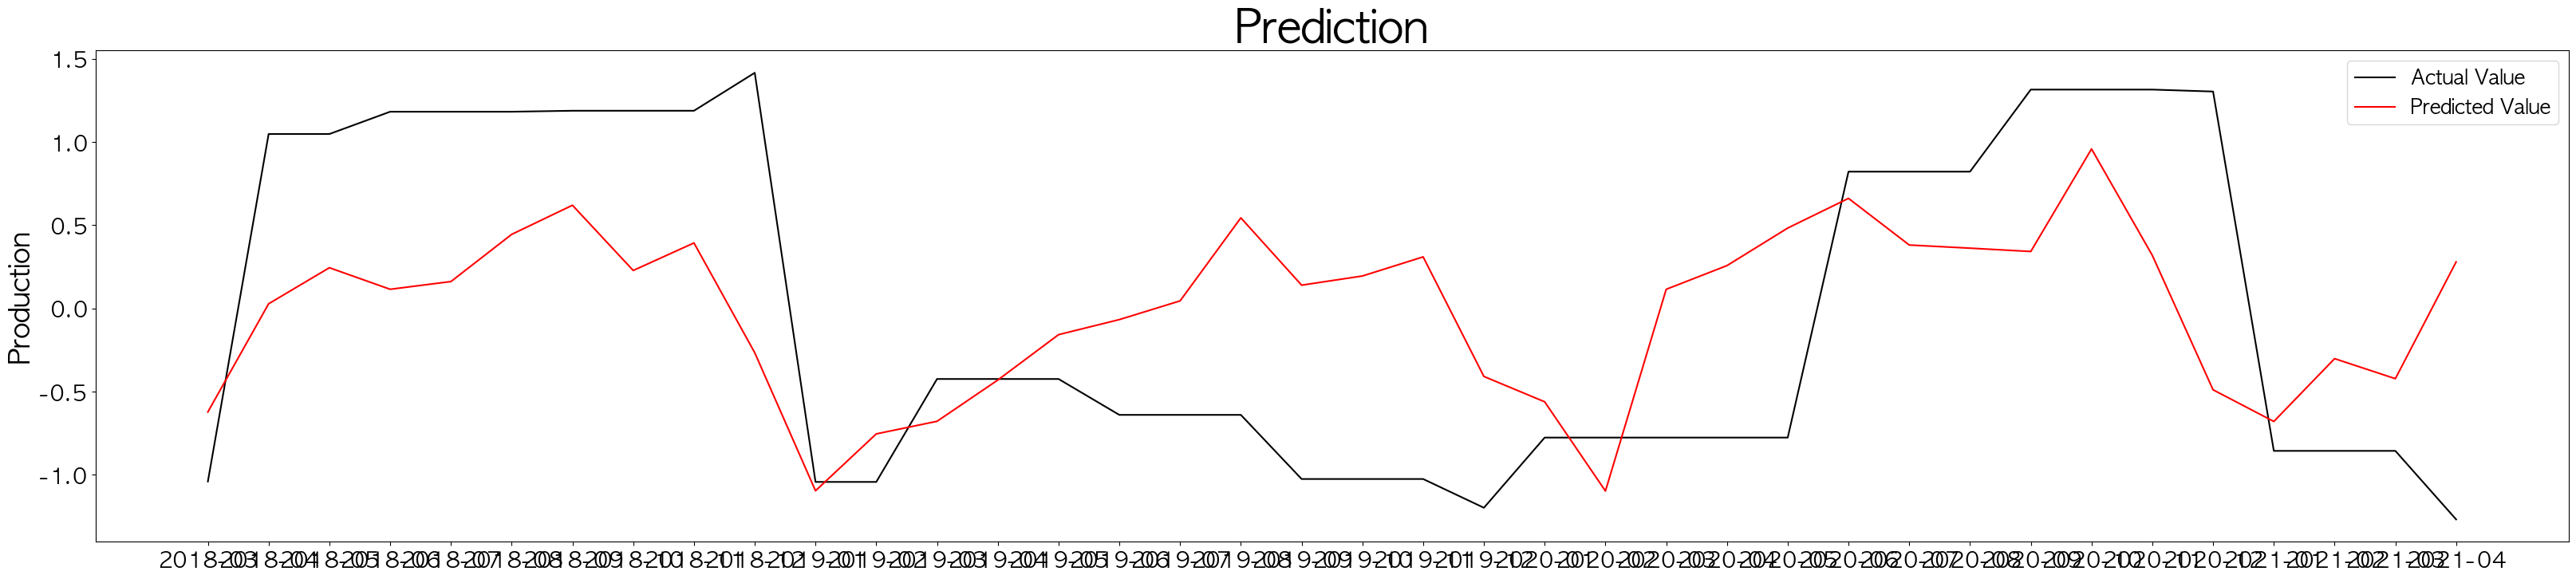

In [182]:
# graph
fig, ax1 = plt.subplots(figsize=(40, 8))

A = pd.concat([y_train, y_test]) # actual value
B = pd.concat([y_predict_train,y_predict]) # predicted value

line1 = ax1.plot(A.index, A['production'], label='Actual Value', color='k')
line2 = ax1.plot(B.index, B['predict'], label='Predicted Value', color='r')
#line3 = ax2.plot(result_y.index, abs(result_y['res']), label='Residual', color='0.5')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('Production', fontdict={'fontsize':25})
#ax2.set_ylabel('Residual', fontdict={'fontsize':25})

# A.reset_index(inplace=True)
# A['datetime_m'] = pd.to_datetime(A['datetime_m'])
# a = A[(A['datetime_m'].dt.month==3)|(A['datetime_m'].dt.month==9)]
# a.set_index('datetime_m', inplace=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xticks(a.index[::2], a.index[::2].strftime('%Y-%m-%d'), rotation=45)
plt.title(f'Prediction', fontdict = {'fontsize' : 40})
#plt.title(f'Train MAE: {round(train_mae, 2)}, Test MAE: {round(mae, 2)}', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
# plt.axhline(3.1, color='0.5', linestyle='--', linewidth=2)
# plt.axvline(x=datetime(2022,2,1), color='0.5', linestyle='--', linewidth=2)
plt.show()

print()